# K-Means

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Generar un set de ejemplo

In [2]:
from sklearn.datasets import make_blobs

In [5]:
X, y =make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.8, random_state=101)

Text(0.5, 1.0, 'Datos Dummy')

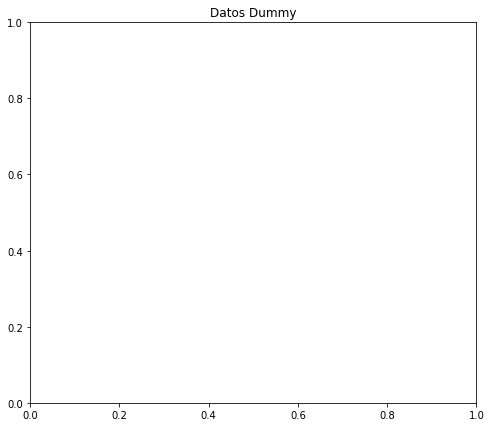

In [4]:
plt.figure(figsize=(8,7))
# Completar   ... plt.scatter(...)
plt.title('Datos Dummy')

### Elaborar el modelo de clusterización mediante K-Means

#### Graficar la clusterización

Text(0.5, 1.0, 'K Means')

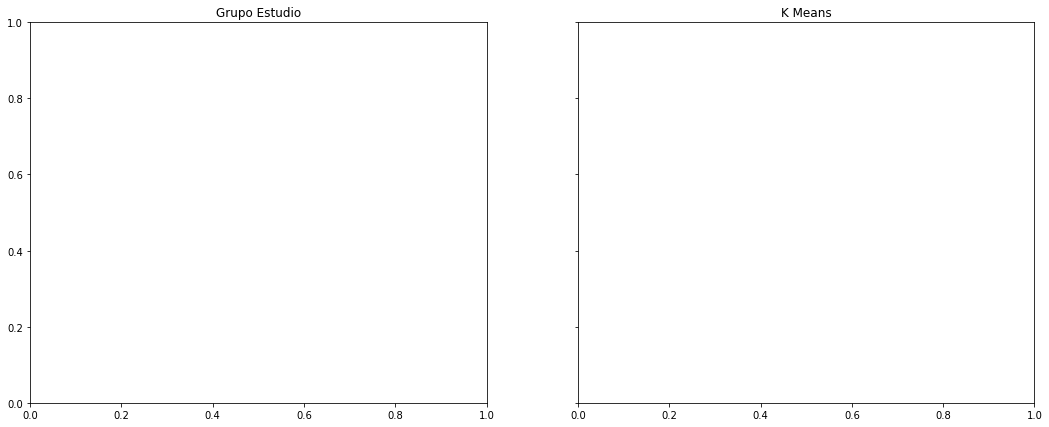

In [3]:
fig, (axes1,axes2) = plt.subplots(1,2, sharey=True, figsize=(18,7))
axes1.set_title('Grupo Estudio')
# COMPLETAR
axes2.set_title('K Means')
# COMPLETAR

#### Metodo del Codo

Text(0, 0.5, 'Inercia')

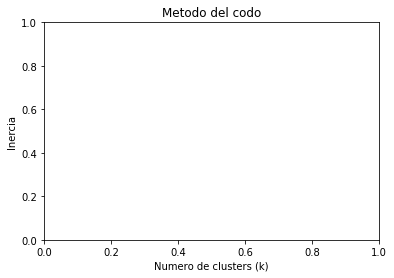

In [6]:
plt.title('Metodo del codo')
plt.xlabel('Numero de clusters (k)')
plt.ylabel('Inercia')
# COMPLETAR

#### Coeficiente de silueta

Text(0, 0.5, 'Coef. Silueta')

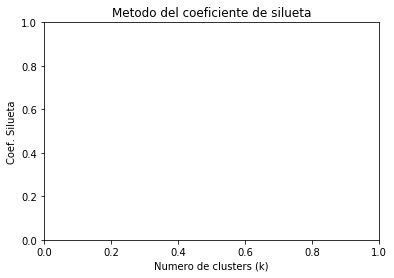

In [7]:
plt.title('Metodo del coeficiente de silueta')
plt.xlabel('Numero de clusters (k)')
plt.ylabel('Coef. Silueta')
# COMPLETAR

In [ ]:
import numpy as np
import matplotlib.cm as cm
range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_

    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

### Clusterizacion Recomendada (k=??)

Text(0.5, 1.0, 'K Means')

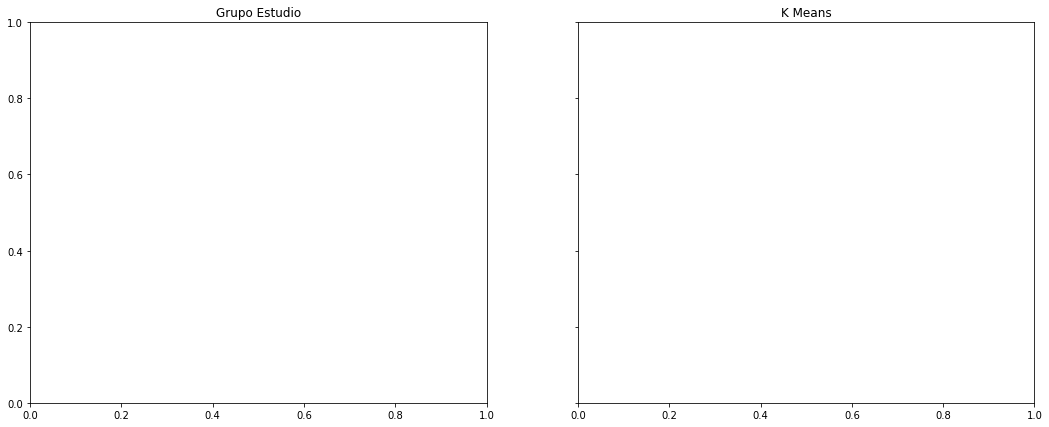

In [9]:
fig, (axes1,axes2) = plt.subplots(1,2, sharey=True, figsize=(18,7))
axes1.set_title('Grupo Estudio')
## COMPLETAR
axes2.set_title('K Means')
## COMPLETAR
